[4750 4755 4759 4761 4764 9499 9506 9509 9514 9516 9520 9523 9525 9527]
[ True  True  True  True  True False False False False False False False
 False False]
[0.51254793 0.3642354  0.67655271 0.37847954 0.39539505]
0.6765527090983805
[False False  True False False]
[4759]
435.7
[435.7] [0.67655271]


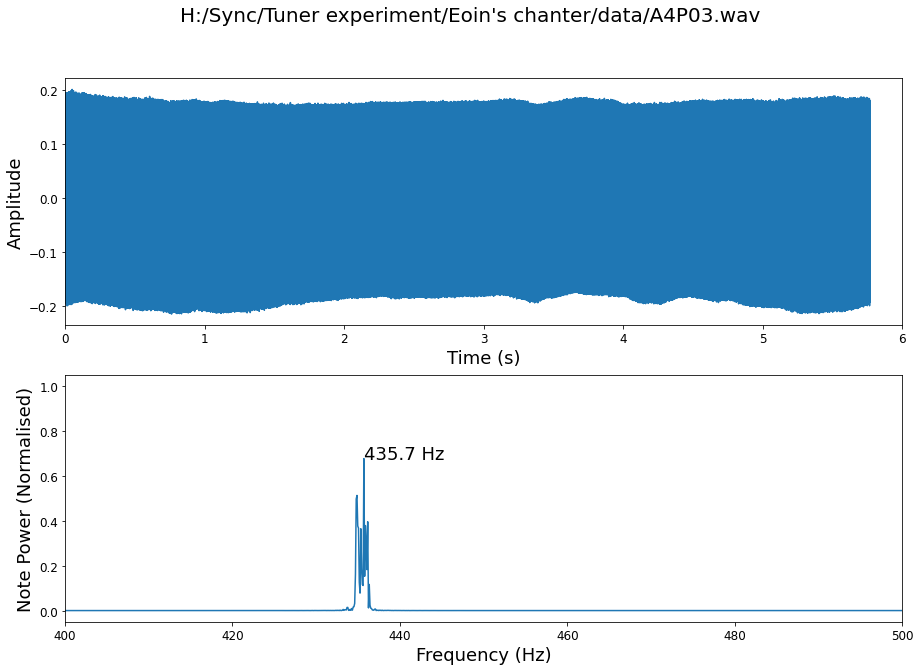

In [52]:
#import capabilities
import tkinter # for file explorer window
from tkinter import filedialog #specify the filedialog
import librosa # audio analytical library
import matplotlib.pyplot as plt # to deal with the graphs
import math
import numpy as np # to deal with the vectors
from scipy.signal import find_peaks #to identify peaks


root = tkinter.Tk()
root.wm_withdraw() # this completely hides the root window

def process_file():
    filename = filedialog.askopenfilename()
    root.destroy()
    y, sr = librosa.load(filename, sr=None)
    
  
    
    m = len(y)
        
    next_power_2 = math.ceil(math.log2(abs(m)))
    n = int(math.pow(2,next_power_2))
    k = int(n/2)
  
    
    Y = np.fft.fft(y, n)
    f = np.linspace(0,k,k)*(sr/n)
   
    
    k = int(np.floor(len(Y)/2))
  
    power1 = abs(Y)**2/n
    plot_power = power1[:k]
    norm_power = (plot_power - np.min(plot_power))/ (np.max(plot_power)-np.min(plot_power))

    
    peaks, _ = find_peaks(norm_power, height=0.250)
    
    print(peaks)
    
    first_peak = peaks[0]
    relevant_peaks = peaks <= first_peak + 100
    print(relevant_peaks)
    
    power_peaks = peaks[relevant_peaks]
    relevant_powers = norm_power[power_peaks]
    print(relevant_powers)
    max_relevant_power = np.max(relevant_powers)
    print(max_relevant_power)
    my_peak_idx = relevant_powers == max_relevant_power
    print(my_peak_idx)
    my_peak = power_peaks[my_peak_idx]
    print(my_peak)
    fund = np.round(f[my_peak],2)
    print(str(fund[0]))
    fund_text = str(fund[0]) + " Hz"
    note_height = norm_power[my_peak]
    print(fund,note_height)
    
    
    
    timestep = 1/sr

    end_time = len(y)/sr
    time = np.arange(0,len(y)*timestep,timestep)
    max_time = math.ceil(end_time)
    
    plt.rc('xtick',labelsize=12) #set global tick label size
    plt.rc('ytick',labelsize=12)
    
    fig, (ax1, ax2) = plt.subplots(2, 1)
    fig.suptitle(filename,fontsize = 20)
    
    fig.set_size_inches(15, 10)
    ax1.plot(time,y)
    ax1.set_ylabel('Amplitude', fontsize = 18)
    ax1.set_xlabel('Time (s)', fontsize = 18)
    ax1.set_xlim(0, max_time)

   
    
    
    
    ax2.plot(f,norm_power)
    ax2.set_ylabel('Note Power (Normalised)',fontsize = 18)
    ax2.set_xlabel('Frequency (Hz)',fontsize = 18)
    ax2.set_xlim(400,500)
    ax2.text(fund,note_height,fund_text,fontsize = 18)


process_file()

root.mainloop()
#plt.savefig('my choice of name.png')

